# Load dataset

In [19]:
# load dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
uploaded = files.upload()

import pandas as pd
data = pd.read_csv('dataset.csv')

# Display the first few rows of the dataframe
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving dataset.csv to dataset (1).csv


,Country,Year,Hospital_density,gdp,Communicable_disease,Hospital_Expenditure,Total_Health_Expenditure,Injury Count,life_expectancy,Mortality,Population
0,Australia,2000,6.648,4.158450e+11,35.6,2.987,7.594,138.30,79.2,676.8,19028802.0
1,Australia,2001,6.656,3.793580e+11,53.3,3.024,7.678,141.76,79.6,667.5,19274701.0
2,Australia,2002,6.586,3.955730e+11,32.2,3.123,7.876,142.60,79.9,682.5,19495210.0
3,Australia,2003,6.521,4.674980e+11,29.3,3.157,7.881,143.47,80.2,668.3,19720737.0
4,Australia,2004,6.477,6.143260e+11,46.4,3.250,8.087,144.10,80.5,663.8,19932722.0


# Exploratory Data Analysis
## Checking the distribution of the variables and relationships between them

In [20]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Get descriptive statistics for the numerical variables
descriptive_stats = data.describe()

# Generate a correlation matrix to understand the relationships between variables
correlation_matrix = data.corr()

missing_values, descriptive_stats, correlation_matrix

<ipython-input-20-ab298cd3cf80>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


(Country                     0
 Year                        0
 Hospital_density            0
 gdp                         0
 Communicable_disease        0
 Hospital_Expenditure        0
 Total_Health_Expenditure    0
 Injury Count                0
 life_expectancy             0
 Mortality                   0
 Population                  0
 dtype: int64,
              Year  Hospital_density           gdp  Communicable_disease  \
 count   897.00000        897.000000  8.970000e+02            897.000000   
 mean   2011.00000          3.437337  1.134285e+12             14.056243   
 std       6.63695          3.347422  2.764813e+12             22.547059   
 min    2000.00000          0.806000  5.686580e+09              0.000000   
 25%    2005.00000          1.838000  7.497366e+10              2.300000   
 50%    2011.00000          2.547000  2.742950e+11              7.400000   
 75%    2017.00000          3.857000  9.577990e+11             15.700000   
 max    2022.00000         24.130000

# Build Model - Multiple Regression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting the independent variables for the regression model
independent_vars = [
    'gdp', 'Communicable_disease', 'Hospital_Expenditure',
    'Total_Health_Expenditure', 'Injury Count', 'life_expectancy',
    'Mortality', 'Population'
]

# Defining the features and target variable for the regression model
X = data[independent_vars]
y = data['Hospital_density']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the multiple regression model
regression_model = LinearRegression()

# Fit the regression model to the training data
regression_model.fit(X_train, y_train)

# Predict the target on the training and test data
y_train_pred = regression_model.predict(X_train)
y_test_pred = regression_model.predict(X_test)

# Calculate performance metrics
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Get regression coefficients
coefficients = pd.DataFrame(regression_model.coef_, independent_vars, columns=['Coefficient'])
intercept = regression_model.intercept_

(train_rmse, test_rmse, train_r2, test_r2), coefficients, intercept


((2.257139442017289,
  2.2875016929624823,
  0.5184962574789596,
  0.6156058155769941),
                            Coefficient
 gdp                      -5.531784e-13
 Communicable_disease      1.563685e-02
 Hospital_Expenditure      2.388438e+00
 Total_Health_Expenditure -3.847172e-01
 Injury Count             -1.004943e-03
 life_expectancy          -2.938645e-01
 Mortality                -1.424756e-03
 Population                2.534741e-08,
 23.093973835491735)

# Visualization

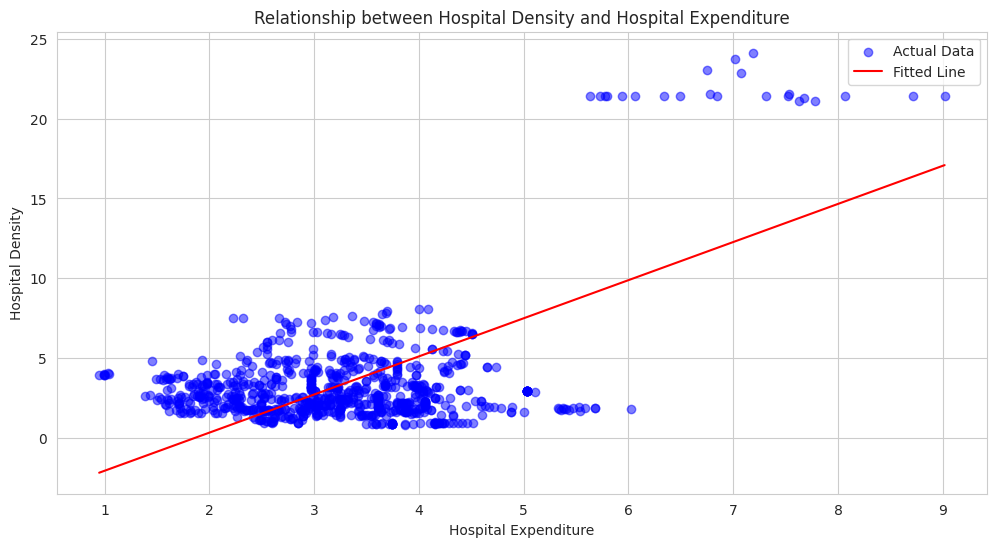

In [23]:
import matplotlib.pyplot as plt

# Visualization of the relationship between hospital density and Hospital_Expenditure
plt.figure(figsize=(12, 6))

# Scatter plot of actual values
plt.scatter(data['Hospital_Expenditure'], data['Hospital_density'], color='blue', alpha=0.5, label='Actual Data')

# Fitted line
# We need to get the predicted values for Hospital_Expenditure while controlling for other variables
# For simplicity, we will use the mean for all other variables
mean_values = X_train.mean().to_dict()
fitted_values = []
for expenditure in sorted(data['Hospital_Expenditure'].unique()):
    mean_values['Hospital_Expenditure'] = expenditure
    fitted_value = regression_model.predict(pd.DataFrame([mean_values]))
    fitted_values.append(fitted_value[0])

plt.plot(sorted(data['Hospital_Expenditure'].unique()), fitted_values, color='red', label='Fitted Line')

plt.title('Relationship between Hospital Density and Hospital Expenditure')
plt.xlabel('Hospital Expenditure')
plt.ylabel('Hospital Density')
plt.legend()
plt.show()



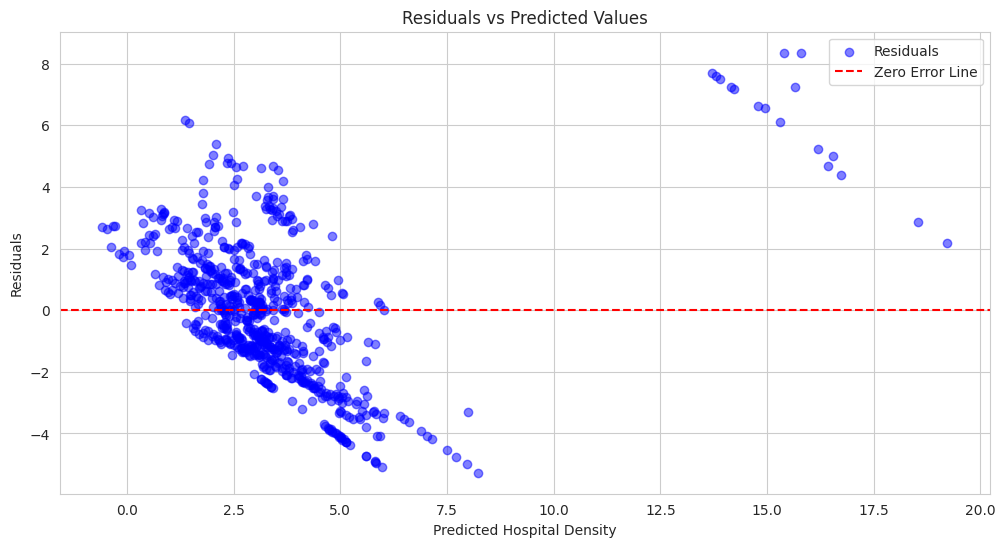

In [24]:
# Residual plot for the training data
plt.figure(figsize=(12, 6))

# Calculate residuals
residuals = y_train - y_train_pred

# Scatter plot of residuals
plt.scatter(y_train_pred, residuals, color='blue', alpha=0.5, label='Residuals')

# Horizontal line at 0 for reference
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error Line')

plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Hospital Density')
plt.ylabel('Residuals')
plt.legend()
plt.show()


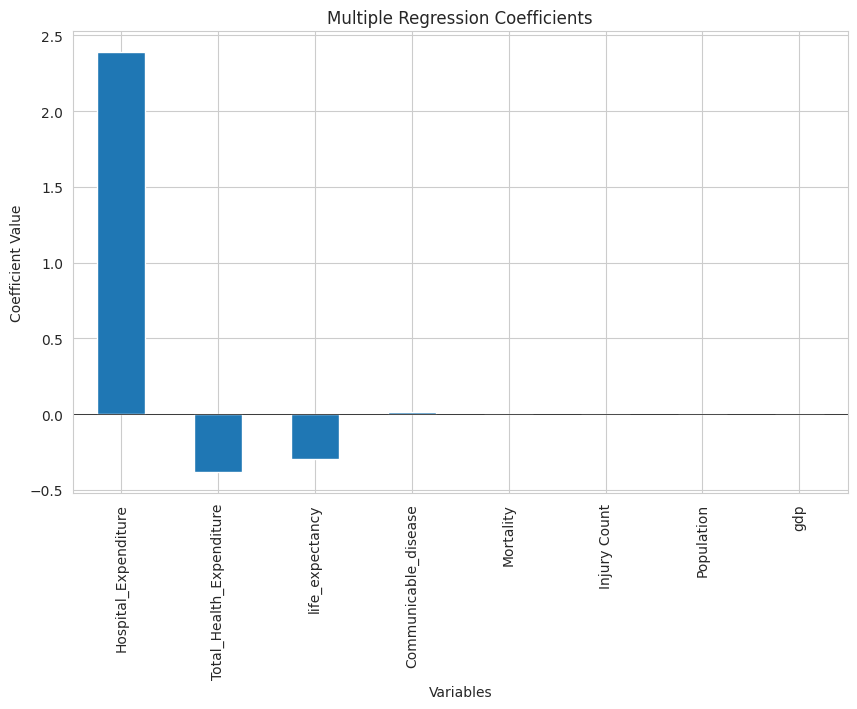

In [25]:
# Bar chart of the regression coefficients
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()
coefficients_sorted = coefficients.sort_values(by='Absolute Coefficient', ascending=False).drop('Absolute Coefficient', axis=1)

plt.figure(figsize=(10, 6))
coefficients_sorted['Coefficient'].plot(kind='bar')
plt.title('Multiple Regression Coefficients')
plt.xlabel('Variables')
plt.ylabel('Coefficient Value')
plt.axhline(y=0, color='black', linewidth=0.5)
plt.show()


<ipython-input-26-658daeaca956>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')


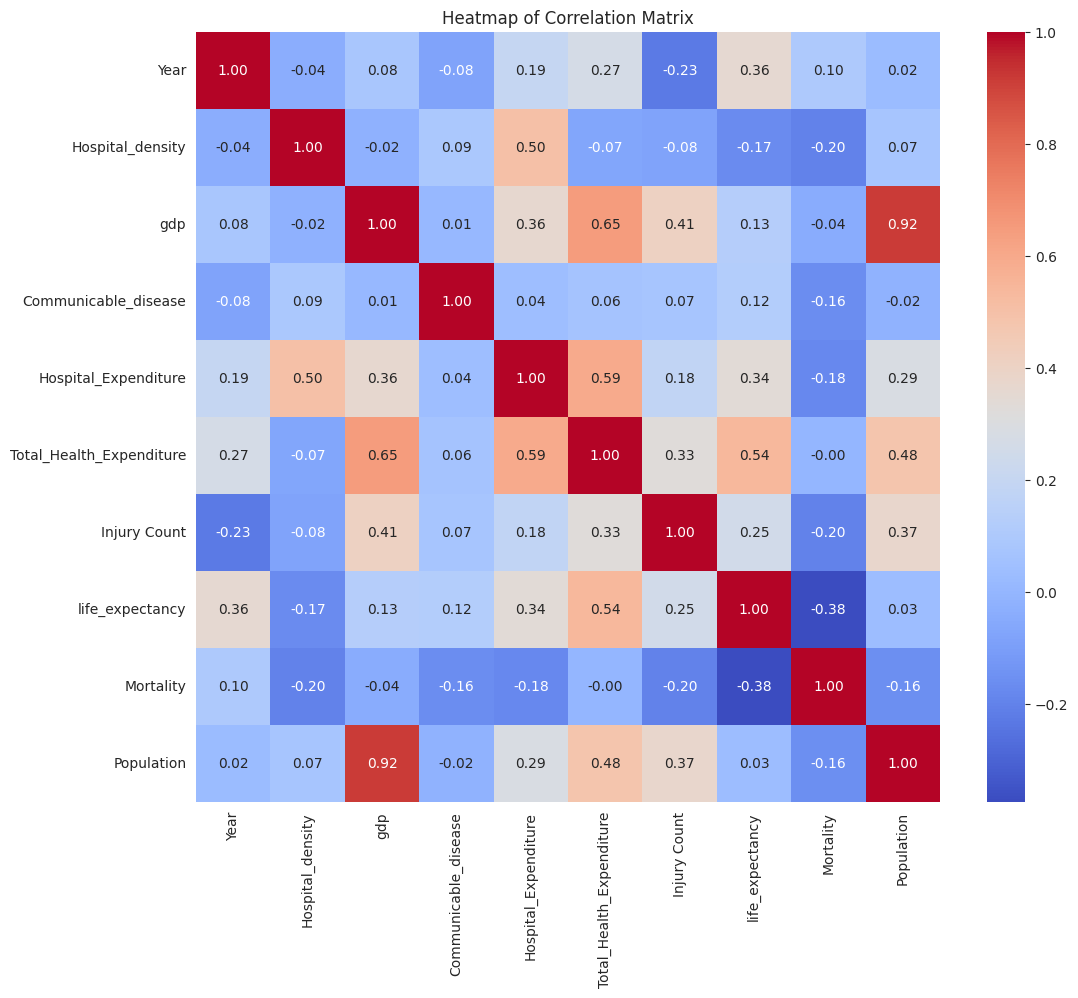

In [26]:
import seaborn as sns

# Heatmap visualization of the correlation matrix including the hospital density
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()
